# Introduction

Hi there! Welcome to the first game I modelled in HS2902😃
I have provided a brief description of the game and the codes and their outputs are shown below!

## The Dove-Hawk Game

The Dove-Hawk Game is a classic model in evolutionary game theory that explores the dynamics between two distinct strategies: cooperation (represented by doves) and aggression (represented by hawks). In this game, individuals encounter each other randomly and engage in interactions that result in various payoffs, influencing their future behavior and evolutionary success.

### Players:

The game involves two types of players: doves and hawks.

Doves: Doves represent cooperative individuals who prioritize mutual benefit and avoid conflict whenever possible. When two doves encounter each other, they engage in peaceful coexistence, resulting in a positive payoff for both parties.
Hawks: Hawks represent aggressive individuals who prioritize personal gain and are willing to engage in conflict to achieve their objectives. When two hawks encounter each other, they engage in aggressive behavior, resulting in a negative payoff for both parties.

### Payoffs:

The payoffs in the Dove-Hawk Game are structured as follows:

Dove-Dove Interaction: When two doves encounter each other, they both receive a positive payoff, reflecting the benefits of peaceful coexistence and cooperation.
Hawk-Hawk Interaction: When two hawks encounter each other, they both receive a negative payoff, reflecting the costs associated with aggressive behavior and conflict.
Dove-Hawk Interaction: When a dove encounters a hawk, the dove suffers a negative payoff while the hawk receives a positive payoff. This outcome illustrates the vulnerability of cooperative individuals to exploitation by aggressive counterparts.


### Credits: 

I used Chat-GPT to help me write the description of the game but I had to modify this to make it more relevant for the reader's convenience to understand the game mechanics.

In [1]:
#this was my first attempt at modelling the uncooperative game between 'hawks' and 'doves'
# the payoff matrix is correct but the algorithm assumes uniform distribution throughout the game 
# which is wrong since the game works as a markov chain with dynamic probabilities after each event
#see my other attempts below!
'''
import random
import matplotlib.pyplot as plt

#payoff matrix will have dove on left side and hawk on right side
payoffs = {
    1: (4, 0),#dd
    2: (-2, 6),#dh
    3: (0, -2),#hh
    4: (-2, 6) #hd,same as dh but dh has highest probability at 0.5 so gotta reflect it via this to make it consistent for uniform distribution
}

def simulate_game(T,N,p1s,p2s,payoffs):
    #p1s&p1p is for dove, p2p&p2s for hawk
    p1p=p1s
    p2p=p2s
    for day in range(N):
        event=random.randint(1,4)
        p1p+=payoffs[event][0]
        p2p+=payoffs[event][1]

    return p1p,p2p

T=20
'''




'\nimport random\nimport matplotlib.pyplot as plt\n\n#payoff matrix will have dove on left side and hawk on right side\npayoffs = {\n    1: (4, 0),#dd\n    2: (-2, 6),#dh\n    3: (0, -2),#hh\n    4: (-2, 6) #hd,same as dh but dh has highest probability at 0.5 so gotta reflect it via this to make it consistent for uniform distribution\n}\n\ndef simulate_game(T,N,p1s,p2s,payoffs):\n    #p1s&p1p is for dove, p2p&p2s for hawk\n    p1p=p1s\n    p2p=p2s\n    for day in range(N):\n        event=random.randint(1,4)\n        p1p+=payoffs[event][0]\n        p2p+=payoffs[event][1]\n\n    return p1p,p2p\n\nT=20\n'

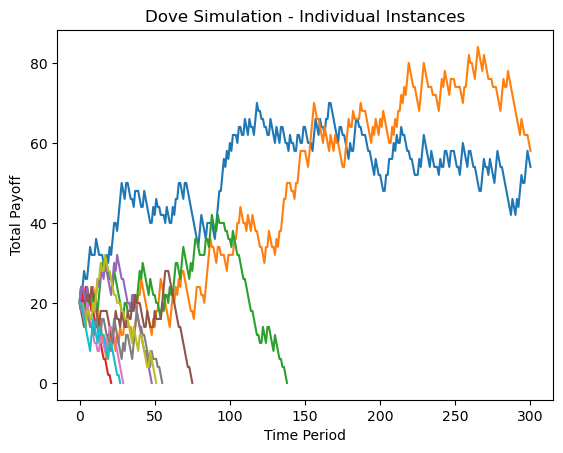

In [2]:
#this attempt also assumes uniform distribution which is wrong
import random
import matplotlib.pyplot as plt

random.seed(123)

def simulate_game(num_periods, num_instances, player1_start, player2_start, payoffs):
    player1_payoff_history_all = []
    player2_payoff_history_all = []

    for _ in range(num_instances):
        player1_payoff = player1_start
        player2_payoff = player2_start
        player1_payoff_history = [player1_payoff]
        player2_payoff_history = [player2_payoff]

        for period in range(num_periods):
            if player1_payoff <= 0 or player2_payoff <= 0:
                break  # Stop the game if either player's payoff is 0 or less
            event = random.randint(1, 4)  # Generating random event (1-4) and this one line of code is how I know my algo is wrong
            player1_payoff += event_payoffs[event][0]
            player2_payoff += event_payoffs[event][1]
            player1_payoff_history.append(player1_payoff)
            player2_payoff_history.append(player2_payoff)

        player1_payoff_history_all.append(player1_payoff_history)
        player2_payoff_history_all.append(player2_payoff_history)

    return player1_payoff_history_all, player2_payoff_history_all

def plot_payoff_instances(player1_payoff_history_all, player2_payoff_history_all):
    num_instances = len(player1_payoff_history_all)

    for i in range(num_instances):
        plt.plot(player1_payoff_history_all[i], label=f'Dove Instance {i+1}')
        #plt.plot(player2_payoff_history_all[i], label=f'Hawk Instance {i+1}')

    plt.xlabel('Time Period')
    plt.ylabel('Total Payoff')
    plt.title('Dove Simulation - Individual Instances')
    #plt.legend()
    plt.show()

# Define event payoffs (event: (player1_payoff_change, player2_payoff_change))
event_payoffs = {
    1: (4, 0),#dd
    2: (-2, 6),#dh
    3: (0, -2),#hh
    4: (-2, 6) #hd,same as dh but dh has highest probability at 0.5 so gotta reflect it via this to make it consistent for uniform distribution
}

# Simulate the game with multiple instances
num_periods = 300
num_instances = 10 # Change this as needed
player1_start = 20
player2_start = 20
player1_payoff_history_all, player2_payoff_history_all = simulate_game(num_periods, num_instances, player1_start, player2_start, event_payoffs)

# Plot each instance separately
plot_payoff_instances(player1_payoff_history_all, player2_payoff_history_all)
# the algo is wrong but this surprisingly displays random walk which makes me wonder how diff algos can point to similar results but thats a topic for another day


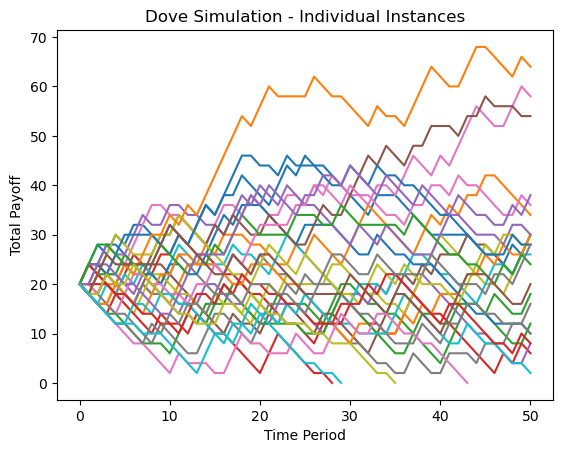

In [3]:
# this is my latest attempt
# i have corrected for dynamic probabilities thus better reflecting the stochastic matrix of the markov chains
#but... its still not 100% correct and you will see in the function below
import random
import matplotlib.pyplot as plt

random.seed(123)

def calculate_event_probabilities(player1_payoff, player2_payoff):
    total_payoffs = player1_payoff + player2_payoff
    event_probabilities = [(player1_payoff / total_payoffs) * ((player1_payoff - 1) / (total_payoffs - 1)) for _ in range(4)]
    # the calculation of the probabilities are correct but this isnt where im getting it wrong
    return event_probabilities

def simulate_game(num_periods, num_instances, player1_start, player2_start, event_payoffs):
    player1_payoff_history_all = []
    player2_payoff_history_all = []

    for _ in range(num_instances):
        player1_payoff = player1_start
        player2_payoff = player2_start
        player1_payoff_history = [player1_payoff]
        player2_payoff_history = [player2_payoff]

        for period in range(num_periods):
            if player1_payoff <= 0 or player2_payoff <= 0:
                break  # Stop the game if either player's payoff is 0 or less
            
            # Calculate event probabilities based on current payoffs
            event_probabilities = calculate_event_probabilities(player1_payoff, player2_payoff)

            # Generating random event (1-4) based on calculated probabilities
            event = random.choices(range(1, 5), event_probabilities)[0]
            #if u read this far, this is where the code works but the algo is wrong 
            # why dont u figure out why this is wrong and see if you can resolve it
            # and if can please share cuz i too tired to figure this out

            # Update player payoffs based on the selected event
            player1_payoff += event_payoffs[event][0]
            player2_payoff += event_payoffs[event][1]
            
            player1_payoff_history.append(player1_payoff)
            player2_payoff_history.append(player2_payoff)

        player1_payoff_history_all.append(player1_payoff_history)
        player2_payoff_history_all.append(player2_payoff_history)

    return player1_payoff_history_all, player2_payoff_history_all

def plot_payoff_instances(player1_payoff_history_all, player2_payoff_history_all):
    num_instances = len(player1_payoff_history_all)

    for i in range(num_instances):
        plt.plot(player1_payoff_history_all[i], label=f'Dove Instance {i+1}')
        #plt.plot(player2_payoff_history_all[i], label=f'Hawk Instance {i+1}')

    plt.xlabel('Time Period')
    plt.ylabel('Total Payoff')
    plt.title('Dove Simulation - Individual Instances')
    #plt.legend()
    plt.show()

# Define event payoffs (event: (player1_payoff_change, player2_payoff_change))
event_payoffs = {
    1: (4, 0),#dd
    2: (-2, 6),#dh
    3: (0, -2),#hh
    4: (-2, 6) #hd,same as dh but dh has highest probability at 0.5 so gotta reflect it via this to make it consistent for uniform distribution
}

# Simulate the game with multiple instances
num_periods = 50
num_instances = 30  # Change this as needed
player1_start = 20
player2_start = 20
player1_payoff_history_all, player2_payoff_history_all = simulate_game(num_periods, num_instances, player1_start, player2_start, event_payoffs)

# Plot each instance separately
plot_payoff_instances(player1_payoff_history_all, player2_payoff_history_all)
